In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

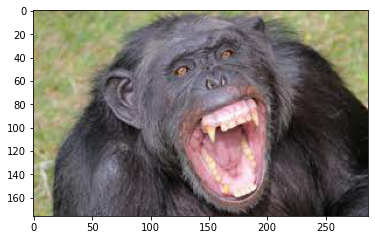

In [2]:
my_image = mpimg.imread('pan.jpeg')
plt.imshow(my_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


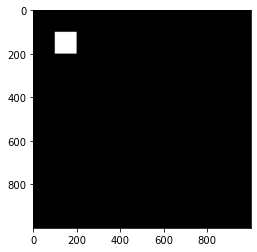

In [3]:
a = np.zeros((1000,1000,3))
a[100:200,100:200,::] = 200
plt.imshow(a)

In [4]:
import netStandalone
import os

PATH = os.path.join(os.environ['HOME'], "workspace_development")

activation_type = netStandalone.v_int([netStandalone.RELU2, netStandalone.RELU2])
handler = netStandalone.net_handler(PATH)
handler.net_create_random_from_vector("FPGA_net", netStandalone.FPGA, 1, netStandalone.v_size_t([1,1]),activation_type)
handler.set_active_net("FPGA_net")

In [5]:
original_image = np.zeros(1000*1000*3)
or_img = np.zeros((1000,1000,3))
f_img = np.zeros((1000,1000,3))

for x in range(100):
    for y in range(100):
        original_image[100 + 1000*(y+100) + x] = 200
        original_image[1000000 + 100 + 1000*(y+100) + x] = 200
        original_image[2000000 + 100 + 1000*(y+100) + x] = 200


In [ ]:
filtered_image = handler.process_img_1000x1000(netStandalone.v_float(original_image))

In [ ]:

for x in range(1000):
    for y in range(1000):
        or_img[y,x,0] = original_image[1000*y + x]
        or_img[y,x,1] = original_image[1000000 + 1000*y + x]
        or_img[y,x,2] = original_image[2000000 + 1000*y + x]

        f_img[y,x,0] = int(filtered_image[1000*y + x])
        f_img[y,x,1] = int(filtered_image[1000*y + x])
        f_img[y,x,2] = int(filtered_image[1000*y + x])

In [ ]:
plt.imshow(or_img)
plt.imshow(f_img)

NameError: name 'plt' is not defined